In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
flight_data = pd.read_csv('Flights_2021_1.csv')

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,13,86,93) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
flight_data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2021,1,1,2,6,2021-01-02,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2021,1,1,3,7,2021-01-03,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2021,1,1,4,1,2021-01-04,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2021,1,1,7,4,2021-01-07,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2021,1,1,8,5,2021-01-08,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [4]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379384 entries, 0 to 379383
Columns: 120 entries, Year to Unnamed: 119
dtypes: float64(72), int64(23), object(25)
memory usage: 347.3+ MB


In [5]:
num_cancelled_flights = flight_data[flight_data['Cancelled'] == True].shape[0]

# Count the number of delayed flights (assuming delayed flights are those with positive arrival delay)
num_delayed_flights = flight_data[flight_data['ArrDelay'] > 0].shape[0]

print("Number of cancelled flights:", num_cancelled_flights)
print("Number of delayed flights:", num_delayed_flights)

total_flights = flight_data.shape[0]

print("Total number of flights:", total_flights)

Number of cancelled flights: 4155
Number of delayed flights: 82608
Total number of flights: 379384


In [6]:
import numpy as np

# Define a function to determine flight status based on 'Cancelled' and 'ArrDelay' columns
def get_flight_status(cancelled, arr_delay):
    flight_status = np.where(cancelled, 'Cancelled', np.where(arr_delay > 0, 'Delayed', 'On Time'))
    return flight_status

# Apply the function to create a new 'FlightStatus' column
flight_data['FlightStatus'] = get_flight_status(flight_data['Cancelled'], flight_data['ArrDelay'])

In [7]:
print(flight_data[['Cancelled', 'ArrDelay', 'FlightStatus']].head())

   Cancelled  ArrDelay FlightStatus
0        0.0     -12.0      On Time
1        0.0     -15.0      On Time
2        0.0      -1.0      On Time
3        0.0      -1.0      On Time
4        0.0      14.0      Delayed


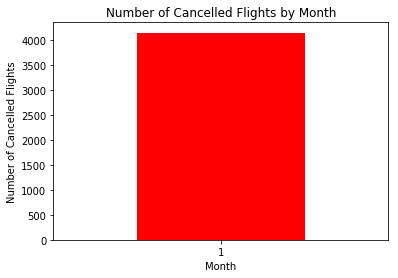

In [8]:
# Filter the DataFrame to include only cancelled flights
cancelled_flights = flight_data[flight_data['FlightStatus'] == 'Cancelled']

# Group the data by month and count the number of cancelled flights in each month
cancelled_by_month = cancelled_flights.groupby('Month')['FlightStatus'].count()

# Plot the results using a bar plot
cancelled_by_month.plot(kind='bar', color='red')
plt.xlabel('Month')
plt.ylabel('Number of Cancelled Flights')
plt.title('Number of Cancelled Flights by Month')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

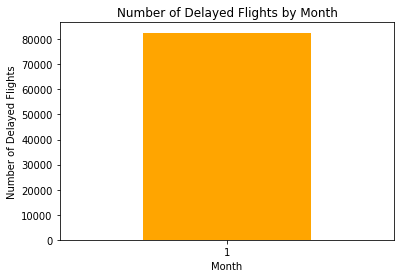

In [9]:
delayed_flights = flight_data[flight_data['FlightStatus'] == 'Delayed']

# Group the data by month and count the number of delayed flights in each month
delayed_by_month = delayed_flights.groupby('Month')['FlightStatus'].count()

# Plot the results using a bar plot
delayed_by_month.plot(kind='bar', color='orange')
plt.xlabel('Month')
plt.ylabel('Number of Delayed Flights')
plt.title('Number of Delayed Flights by Month')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

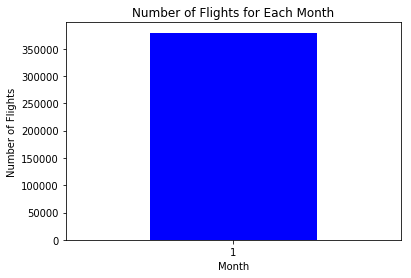

In [10]:
flights_by_month = flight_data['Month'].value_counts().sort_index()

# Plot the results using a bar plot
flights_by_month.plot(kind='bar', color='blue')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Number of Flights for Each Month')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [11]:
# Randomly sample 10% of the data
sampled_data = flight_data.sample(frac=0.1, random_state=42)


In [12]:
# Identify categorical columns
categorical_columns = [
    'FlightDate', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
    'IATA_Code_Marketing_Airline', 'Originally_Scheduled_Code_Share_Airline',
    'IATA_Code_Originally_Scheduled_Code_Share_Airline',
    'Tail_Number', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateName',
    'Dest', 'DestCityName', 'DestState', 'DestStateName', 'DepTimeBlk', 'ArrTimeBlk',
    'CancellationCode', 'Div1Airport', 'Div1TailNum', 'Div2Airport', 'Div2TailNum',
    'Duplicate'
]

In [13]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create a DataFrame containing only the categorical variables
X_categorical = sampled_data[categorical_columns]

# Fill missing values with a placeholder (e.g., 'missing')
X_categorical_filled = X_categorical.fillna('missing')

# Convert categorical variables to numerical representations
X_categorical_encoded = X_categorical_filled.apply(lambda col: pd.factorize(col)[0])


In [14]:

# Perform one-hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X_categorical_encoded)


In [18]:
from sklearn.model_selection import train_test_split

y_sample = sampled_data['FlightStatus']


# Split the encoded dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_sample, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (30350, 6476) (30350,)
Test set shape: (7588, 6476) (7588,)


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create an instance of DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [20]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.733394833948


In [21]:
from sklearn.metrics import f1_score

# Assuming you have already trained your classifier and made predictions
predictions = clf.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, predictions, average='weighted')

print("F1 Score:", f1)


F1 Score: 0.721039603997


In [35]:
for column in flight_data.columns:
    print(f"{column}: {flight_data[column].dtype}")


Year: int64
Quarter: int64
Month: int64
DayofMonth: int64
DayOfWeek: int64
FlightDate: object
Marketing_Airline_Network: object
Operated_or_Branded_Code_Share_Partners: object
DOT_ID_Marketing_Airline: int64
IATA_Code_Marketing_Airline: object
Flight_Number_Marketing_Airline: int64
Originally_Scheduled_Code_Share_Airline: object
DOT_ID_Originally_Scheduled_Code_Share_Airline: float64
IATA_Code_Originally_Scheduled_Code_Share_Airline: object
Flight_Num_Originally_Scheduled_Code_Share_Airline: float64
Operating_Airline : object
DOT_ID_Operating_Airline: int64
IATA_Code_Operating_Airline: object
Tail_Number: object
Flight_Number_Operating_Airline: int64
OriginAirportID: int64
OriginAirportSeqID: int64
OriginCityMarketID: int64
Origin: object
OriginCityName: object
OriginState: object
OriginStateFips: int64
OriginStateName: object
OriginWac: int64
DestAirportID: int64
DestAirportSeqID: int64
DestCityMarketID: int64
Dest: object
DestCityName: object
DestState: object
DestStateFips: int64
De